In [62]:
import pandas as pd
import numpy as np
import ast 
import json
import time
import random
from matplotlib.ticker import MaxNLocator
from scipy import stats
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#makes a data frame of the reviews, minus the books

no_books_reviews_df = pd.read_csv('reviews (no books).csv')

In [3]:
#Generates a list of all book review files names

book_prefix='Book Reviews/reviews_books_'
book_review_files = []

for file_no in range(1,3001):
    book_review_files.append(book_prefix + str(file_no).zfill(4) + '.csv')

In [4]:
#Generates a list of data frames to concatenate

i = 0
book_concat_list=[]


for file in book_review_files:
    df = pd.read_csv(file)
    book_concat_list.append(df)
    i += 1
    
    if i % 100 == 0:
        print(file)
        
        

Book Reviews/reviews_books_0100.csv
Book Reviews/reviews_books_0200.csv
Book Reviews/reviews_books_0300.csv
Book Reviews/reviews_books_0400.csv
Book Reviews/reviews_books_0500.csv
Book Reviews/reviews_books_0600.csv
Book Reviews/reviews_books_0700.csv
Book Reviews/reviews_books_0800.csv
Book Reviews/reviews_books_0900.csv
Book Reviews/reviews_books_1000.csv
Book Reviews/reviews_books_1100.csv
Book Reviews/reviews_books_1200.csv
Book Reviews/reviews_books_1300.csv
Book Reviews/reviews_books_1400.csv
Book Reviews/reviews_books_1500.csv
Book Reviews/reviews_books_1600.csv
Book Reviews/reviews_books_1700.csv
Book Reviews/reviews_books_1800.csv
Book Reviews/reviews_books_1900.csv
Book Reviews/reviews_books_2000.csv
Book Reviews/reviews_books_2100.csv
Book Reviews/reviews_books_2200.csv
Book Reviews/reviews_books_2300.csv
Book Reviews/reviews_books_2400.csv
Book Reviews/reviews_books_2500.csv
Book Reviews/reviews_books_2600.csv
Book Reviews/reviews_books_2700.csv
Book Reviews/reviews_books_2

In [5]:
#Concats a single book reviews dataframe

book_reviews_df = pd.concat(book_concat_list)

book_reviews_df['category'] = 'Books'

In [6]:
#concats books and no books review dataframes

concat_list = [no_books_reviews_df, book_reviews_df]

all_reviews = pd.concat(concat_list)

In [7]:
#creates list of all file names containing the meta data

meta_list = []

# apps
#prefix='Metadata/meta_Apps_for_Android_file'
#for file_no in range(1,2):
#    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')

#books
prefix='Metadata/meta_Books_file'
for file_no in range(1,35):
    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')
    
#CDs
prefix='Metadata/meta_CDs_and_Vinyl_file'
for file_no in range(1,6):
    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')

#electronics
#prefix='Metadata/meta_electronics_file'
#for file_no in range(1,7):
#    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')

#Kindle
#prefix='Metadata/meta_Kindle_store_file'
#for file_no in range(1,7):
#    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')
    
#Movies_and_TV
#prefix='Metadata/meta_Movies_and_TV_file'
#for file_no in range(1,5):
#    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')


In [8]:
#concats a list of smaller metadata datafames

meta_concat_list=[]


for file in meta_list:
    df = pd.read_csv(file)
    meta_concat_list.append(df)


In [9]:
#concats a single metadata dataframe, de-dupes

meta_df = pd.concat(meta_concat_list)

print(len(meta_df))

meta_df.drop_duplicates(inplace=True)

print(len(meta_df))

390000
390000


In [10]:
#merges the reviews df with the metadata df

amazon_data = all_reviews.merge(meta_df, how='left', left_on='asin', right_on='ASIN')

In [11]:
#Drop 'ASIN' from the right column

#Some reviews will still have no metadata

amazon_data = amazon_data.drop('ASIN', axis=1)

In [12]:
len(amazon_data)

4821622

In [13]:
amazon_data.groupby(['category']).count()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank
category,,,,,,,,,,,
Books,3000000,3000000,3000000,2999753,3000000,0,0,0,0,2539170,0
CDs and Vinyl,327759,327759,327759,327748,327759,327759,326635,327740,327759,166810,255726
Electronics,1493863,1493863,1493863,1492902,1493863,1493863,1469941,1493849,1493863,0,0


In [14]:
#  categories = Books , CDs and Vinyl , Electronics
#  some rows don't inclued any reviw texts. so i need to drop them.
amazon_data['reviewText'].replace('', np.nan)

amazon_data.dropna(axis=0, how='any', subset=['reviewText'], inplace=True)


amazon_data.groupby(['category']).count()


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank
category,,,,,,,,,,,
Books,2999753,2999753,2999753,2999753,2999753,0,0,0,0,2538950,0
CDs and Vinyl,327748,327748,327748,327748,327748,327748,326624,327729,327748,166803,255718
Electronics,1492902,1492902,1492902,1492902,1492902,1492902,1468982,1492888,1492902,0,0


In [15]:
#  categories = Books , CDs and Vinyl , Electronics
# for Books
books = amazon_data[amazon_data['category']=='Books']
books.reset_index(drop=True, inplace=True)

# # for CDs and Vinyl
# cd_vinyls = amazon_data[amazon_data['category']=='CDs and Vinyl']
# cd_vinyls.reset_index(drop=True, inplace=True)

# # for Electronics
# electronics = amazon_data[amazon_data['category']=='Electronics']
# electronics.reset_index(drop=True, inplace=True)

unique_index = set()
sample = []
on_off = True
count = 0

while on_off == True:
    generated = random.randint(0, len(books))
    
    if generated in unique_index:
        pass
    
    else:
        unique_index.add(generated)
        sample.append(generated)
        count += 1
        
    if count == 10:
        on_off = False
        
just_book = books.sample(10000)
just_book.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank
526481,0147508770,Books,"[0, 0]",5.0,I thoroughly enjoyed the series.The television...,"06 28, 2013",NaN,NaN,NaN,NaN,The Walt Longmire Mystery Series Boxed Set Vol...,NaN
2970778,0895876116,Books,"[0, 0]",3.0,This book is not what I was expecting. I think...,"06 13, 2014",NaN,NaN,NaN,NaN,Met Her on the Mountain: A Forty-Year Quest to...,NaN
129303,0061231401,Books,"[1, 1]",4.0,Conspiracies abound and the Sigma team has onl...,"06 21, 2010",NaN,NaN,NaN,NaN,The Doomsday Key: A Sigma Force Novel,NaN
1022197,316228532,Books,"[0, 4]",1.0,Like others I wanted to read this book by this...,"11 21, 2012",NaN,NaN,NaN,NaN,NaN,NaN
2601891,778314529,Books,"[0, 0]",5.0,Sucked you in by the 1st chapter. All of the s...,"05 2, 2014",NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# for CDs and Vinyl
cd_vinyls = amazon_data[amazon_data['category']=='CDs and Vinyl']
cd_vinyls.reset_index(drop=True, inplace=True)

unique_index = set()
sample = []
on_off = True
count = 0

while on_off == True:
    generated = random.randint(0, len(cd_vinyls))
    
    if generated in unique_index:
        pass
    
    else:
        unique_index.add(generated)
        sample.append(generated)
        count += 1
        
    if count == 10000:
        on_off = False
just_cds = cd_vinyls.iloc[sample,:]
just_cds.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank
156894,B000DN6ZGC,CDs and Vinyl,"[0, 0]",4.0,I liked most of this cd. Some songs... not so ...,"11 4, 2013",A3GDA1OQJ05LUQ,"Mstery16 ""Mstery16""",Beautiful voice...,1.383523e+09,Corinne Bailey Rae,162514.0
310502,B00DEPVNZO,CDs and Vinyl,"[40, 43]",5.0,As a long-time Neil Young fan it is truly spec...,"12 10, 2013",A2XXBZPQT5EXHV,Darren O'Neill,A Solo-Acoustic Gem,1.386634e+09,NaN,NaN
186507,B001GKYBX0,CDs and Vinyl,"[3, 3]",5.0,"Awesome music from Paul. The songs are great, ...","11 5, 2010",AUHZ4NEDBKM1X,NEOPROG RAN,Big MAC Attack,1.288915e+09,NaN,139267.0
96677,B00000J7I8,CDs and Vinyl,"[0, 0]",5.0,GIRLS GIRLS GIRLS is another great solid colle...,"04 12, 2014",A35GNQK1DC7WXU,FLUMINENSE,GREAT GREAT ALBUM!!!!!!,1.397261e+09,Girls Girls Girls,427719.0
321324,B00GALB44Y,CDs and Vinyl,"[1, 1]",4.0,So far I really like this CD. A few of the sl...,"12 25, 2013",A4W859PUSEAF7,"B. Henshaw ""safehaven""",Solid Comeback,1.387930e+09,NaN,NaN


In [17]:
# for Electronics
electronics = amazon_data[amazon_data['category']=='Electronics']
electronics.reset_index(drop=True, inplace=True)

unique_index = set()
sample = []
on_off = True
count = 0

while on_off == True:
    generated = random.randint(0, len(electronics))
    
    if generated in unique_index:
        pass
    
    else:
        unique_index.add(generated)
        sample.append(generated)
        count += 1
        
    if count == 10000:
        on_off = False
just_electronics = electronics.iloc[sample,:]
just_electronics.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank
1051553,B006UIFTTS,Electronics,"[0, 0]",4.0,The mouse is a little bigger than I may have w...,"09 23, 2012",A267NC6VW6ROB,Ollie,Some quirky features but so far so good,1.348358e+09,NaN,NaN
1054096,B006W8U2MU,Electronics,"[0, 0]",5.0,I received it as promised and put it in my Key...,"01 24, 2013",A26FH1ZYKMG1Q8,evo1,you will forget you have a flashdrive,1.358986e+09,NaN,NaN
1043920,B006PWGEVQ,Electronics,"[0, 0]",5.0,I like this the best of all the cases for thes...,"02 24, 2014",A2KY6E0C4HX0TP,Amazon Customer,Nice case for ASUS T100,1.393200e+09,NaN,NaN
284943,B001EZYMF4,Electronics,"[1, 1]",5.0,I have had these buds for about 2 years and th...,"11 1, 2012",A31KCRU7QO52P5,Yosh2185,Best Earbuds I've Bought,1.351728e+09,NaN,NaN
567278,B003ELYQGG,Electronics,"[0, 0]",4.0,I have been listening to classical music on th...,"05 21, 2012",ATLZNVLYKP9AZ,T. Fisher,Excellent at this price point,1.337558e+09,NaN,NaN


In [18]:
#  to get helpful score for books.

helpful_value_book = just_book['helpful']


just_book['helpfulness']=''

#for loop 
for index,row in just_book.iterrows():
   
    helpful_score_book = int(row['helpful'].replace('[','').replace(']','').split(',')[0])
    total_vote_book = int(row['helpful'].replace('[','').replace(']','').split(',')[1])
 
    try:
        helpfulness = helpful_score_book/total_vote_book
       
    except ZeroDivisionError:
        helpfulness = np.nan
        
#     print(helpfulness)
    just_book.loc[index,'helpfulness']=helpfulness
    
#  we need to drop NaN's from helpfulness column

helpful_df1_book = just_book.dropna(axis=0,how='any',subset=['helpfulness'])
# helpful_df1 includes 1 or perfect heplful score. if we want to avoid this score
# helpful_df2_book = helpful_df1[helpful_df1['helpfulness'] != 1]
# # but i use helpful_df1 toavoid to miss values
helpful_df1_book.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank,helpfulness
129303,0061231401,Books,"[1, 1]",4.0,Conspiracies abound and the Sigma team has onl...,"06 21, 2010",NaN,NaN,NaN,NaN,The Doomsday Key: A Sigma Force Novel,NaN,1
1022197,316228532,Books,"[0, 4]",1.0,Like others I wanted to read this book by this...,"11 21, 2012",NaN,NaN,NaN,NaN,NaN,NaN,0
1477615,0399156828,Books,"[0, 1]",1.0,Having enjoyed many of Gibson's earlier works....,"09 13, 2011",NaN,NaN,NaN,NaN,Zero History,NaN,0
788666,0310419174,Books,"[1, 7]",2.0,** Be sure to follow my recommendation to the ...,"12 12, 2012",NaN,NaN,NaN,NaN,Once-A-Day At the Table Family Devotional: 365...,NaN,0.142857
1806726,0451239776,Books,"[2, 2]",4.0,Most of Ralph Cotton's material is well writte...,"05 4, 2013",NaN,NaN,NaN,NaN,High Wild Desert (Ralph Cotton Western Series),NaN,1


In [19]:
helpful_df1_book.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank,helpfulness
129303,0061231401,Books,"[1, 1]",4.0,Conspiracies abound and the Sigma team has onl...,"06 21, 2010",NaN,NaN,NaN,NaN,The Doomsday Key: A Sigma Force Novel,NaN,1
1022197,316228532,Books,"[0, 4]",1.0,Like others I wanted to read this book by this...,"11 21, 2012",NaN,NaN,NaN,NaN,NaN,NaN,0
1477615,0399156828,Books,"[0, 1]",1.0,Having enjoyed many of Gibson's earlier works....,"09 13, 2011",NaN,NaN,NaN,NaN,Zero History,NaN,0
788666,0310419174,Books,"[1, 7]",2.0,** Be sure to follow my recommendation to the ...,"12 12, 2012",NaN,NaN,NaN,NaN,Once-A-Day At the Table Family Devotional: 365...,NaN,0.142857
1806726,0451239776,Books,"[2, 2]",4.0,Most of Ralph Cotton's material is well writte...,"05 4, 2013",NaN,NaN,NaN,NaN,High Wild Desert (Ralph Cotton Western Series),NaN,1


In [22]:
helpful_value_cds = just_cds['helpful']


just_cds['helpfulness']=''

#for loop 
for index,row in just_cds.iterrows():
   
   
    helpful_score_cd = int(row['helpful'].replace('[','').replace(']','').split(',')[0])
    total_vote_cd= int(row['helpful'].replace('[','').replace(']','').split(',')[1])
  
 
    try:
        helpfulness = helpful_score_cd/total_vote_cd
    
       
    except ZeroDivisionError:
        helpfulness = np.nan
    
        
#     print(helpfulness)
    just_cds.loc[index,'helpfulness']=helpfulness
    
#  we need to drop NaN's from helpfulness column

helpful_df1_cd = just_cds.dropna(axis=0,how='any',subset=['helpfulness'])
# helpful_df1 includes 1 or perfect heplful score. if we want to avoid this score
# helpful_df2_book = helpful_df1[helpful_df1['helpfulness'] != 1]
# # but i use helpful_df1 toavoid to miss values
helpful_df1_cd.head()


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank,helpfulness
310502,B00DEPVNZO,CDs and Vinyl,"[40, 43]",5.0,As a long-time Neil Young fan it is truly spec...,"12 10, 2013",A2XXBZPQT5EXHV,Darren O'Neill,A Solo-Acoustic Gem,1.386634e+09,NaN,NaN,0.930233
186507,B001GKYBX0,CDs and Vinyl,"[3, 3]",5.0,"Awesome music from Paul. The songs are great, ...","11 5, 2010",AUHZ4NEDBKM1X,NEOPROG RAN,Big MAC Attack,1.288915e+09,NaN,139267.0,1
321324,B00GALB44Y,CDs and Vinyl,"[1, 1]",4.0,So far I really like this CD. A few of the sl...,"12 25, 2013",A4W859PUSEAF7,"B. Henshaw ""safehaven""",Solid Comeback,1.387930e+09,NaN,NaN,1
240526,B004UHPTZ0,CDs and Vinyl,"[2, 2]",3.0,"OK, first of all: we all know that hearing any...","07 6, 2013",A2WQF0QROK09AT,F. J. PRISCO,"Now, Now People :)",1.373069e+09,NaN,355570.0,1
261622,B006WFSWHK,CDs and Vinyl,"[1, 2]",4.0,This is an excellent compilation or assortment...,"03 14, 2013",A1UPV379XZ7XG4,K.K.,Something's missing,1.363219e+09,NaN,NaN,0.5


In [21]:
helpful_df1_cd.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank,helpfulness
310502,B00DEPVNZO,CDs and Vinyl,"[40, 43]",5.0,As a long-time Neil Young fan it is truly spec...,"12 10, 2013",A2XXBZPQT5EXHV,Darren O'Neill,A Solo-Acoustic Gem,1.386634e+09,NaN,NaN,0.930233
186507,B001GKYBX0,CDs and Vinyl,"[3, 3]",5.0,"Awesome music from Paul. The songs are great, ...","11 5, 2010",AUHZ4NEDBKM1X,NEOPROG RAN,Big MAC Attack,1.288915e+09,NaN,139267.0,1
321324,B00GALB44Y,CDs and Vinyl,"[1, 1]",4.0,So far I really like this CD. A few of the sl...,"12 25, 2013",A4W859PUSEAF7,"B. Henshaw ""safehaven""",Solid Comeback,1.387930e+09,NaN,NaN,1
240526,B004UHPTZ0,CDs and Vinyl,"[2, 2]",3.0,"OK, first of all: we all know that hearing any...","07 6, 2013",A2WQF0QROK09AT,F. J. PRISCO,"Now, Now People :)",1.373069e+09,NaN,355570.0,1
261622,B006WFSWHK,CDs and Vinyl,"[1, 2]",4.0,This is an excellent compilation or assortment...,"03 14, 2013",A1UPV379XZ7XG4,K.K.,Something's missing,1.363219e+09,NaN,NaN,0.5


In [23]:
#  to get helpful score for electronics.

helpful_value_elec = just_electronics['helpful']


just_electronics['helpfulness']=''

#for loop 
for index,row in just_electronics.iterrows():
   
    helpful_score_elec = int(row['helpful'].replace('[','').replace(']','').split(',')[0])
    total_vote_elec = int(row['helpful'].replace('[','').replace(']','').split(',')[1])
 
    try:
        helpfulness = helpful_score_elec/total_vote_elec
       
    except ZeroDivisionError:
        helpfulness = np.nan
        
#     print(helpfulness)
    just_electronics.loc[index,'helpfulness']=helpfulness
    
#  we need to drop NaN's from helpfulness column

helpful_df1_elec = just_electronics.dropna(axis=0,how='any',subset=['helpfulness'])
# helpful_df1 includes 1 or perfect heplful score. if we want to avoid this score
# helpful_df2_book = helpful_df1[helpful_df1['helpfulness'] != 1]
# # but i use helpful_df1 toavoid to miss values
helpful_df1_elec.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank,helpfulness
284943,B001EZYMF4,Electronics,"[1, 1]",5.0,I have had these buds for about 2 years and th...,"11 1, 2012",A31KCRU7QO52P5,Yosh2185,Best Earbuds I've Bought,1.351728e+09,NaN,NaN,1
1152859,B007ZZ6OW6,Electronics,"[1, 1]",3.0,Ok first let me start out by saying i have own...,"12 21, 2012",ABR3WFNHG4122,chulo15157,Almost there but not great,1.356048e+09,NaN,NaN,1
887421,B0055W2XQM,Electronics,"[2, 3]",4.0,Installs in under a minute with only minimal p...,"12 9, 2011",A2K69DOY8JC5VN,netscorer,"Good, affordable choice to protect your camera...",1.323389e+09,NaN,NaN,0.666667
996513,B005VTIMEQ,Electronics,"[4, 5]",5.0,"Obviously, I don't want to carry around every ...","03 25, 2012",A10C5CJK1YKGV0,Steffan Piper,Finally! I have a camera bag that fits my equi...,1.332634e+09,NaN,NaN,0.8
1074361,B0074CISLK,Electronics,"[2, 2]",5.0,This turned out not to be the correct battery ...,"05 26, 2013",A1DN7JAXDFMPH2,"winifred ""winifred""",Not the correct battery for my Back-ups ES 500,1.369526e+09,NaN,NaN,1


In [24]:
helpful_df1_elec.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank,helpfulness
284943,B001EZYMF4,Electronics,"[1, 1]",5.0,I have had these buds for about 2 years and th...,"11 1, 2012",A31KCRU7QO52P5,Yosh2185,Best Earbuds I've Bought,1.351728e+09,NaN,NaN,1
1152859,B007ZZ6OW6,Electronics,"[1, 1]",3.0,Ok first let me start out by saying i have own...,"12 21, 2012",ABR3WFNHG4122,chulo15157,Almost there but not great,1.356048e+09,NaN,NaN,1
887421,B0055W2XQM,Electronics,"[2, 3]",4.0,Installs in under a minute with only minimal p...,"12 9, 2011",A2K69DOY8JC5VN,netscorer,"Good, affordable choice to protect your camera...",1.323389e+09,NaN,NaN,0.666667
996513,B005VTIMEQ,Electronics,"[4, 5]",5.0,"Obviously, I don't want to carry around every ...","03 25, 2012",A10C5CJK1YKGV0,Steffan Piper,Finally! I have a camera bag that fits my equi...,1.332634e+09,NaN,NaN,0.8
1074361,B0074CISLK,Electronics,"[2, 2]",5.0,This turned out not to be the correct battery ...,"05 26, 2013",A1DN7JAXDFMPH2,"winifred ""winifred""",Not the correct battery for my Back-ups ES 500,1.369526e+09,NaN,NaN,1


In [26]:
# for Books
overall_values = [1, 2, 3, 4, 5]

ave_compound_book = []
overalls_book = []
overall_dict_book = {}

for value in overall_values:

    overall_grouped = just_book.loc[just_book['overall'] == value]

    compound_list = []
    

    for row in overall_grouped['reviewText']:

        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list.append(compound)
        

    ave_compound_score = np.mean(compound_list)    
    ave_compound_book.append(ave_compound_score)
    overalls_book.append(value)

overall_dict_book = {
    "Overall Score" : overalls_book,
    "Average Review Compound" : ave_compound_book,
}

df_book_analys = pd.DataFrame(overall_dict_book)
df_book_analys.head()

,Average Review Compound,Overall Score
0,-0.010782,1
1,0.210304,2
2,0.465032,3
3,0.647007,4
4,0.690194,5


In [28]:
# for CDs
overall_values = [1, 2, 3, 4, 5]

ave_compound_cd = []
overalls_cd = []
overall_dict_cd = {}

for value in overall_values:

    overall_grouped = just_cds.loc[just_cds['overall'] == value]

    compound_list = []
    

    for row in overall_grouped['reviewText']:

        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list.append(compound)
        

    ave_compound_score = np.mean(compound_list)    
    ave_compound_cd.append(ave_compound_score)
    overalls_cd.append(value)

overall_dict_cd = {
    "Overall Score" : overalls_cd,
    "Average Review Compound" : ave_compound_cd,
}

df_cd_analys = pd.DataFrame(overall_dict_cd)
df_cd_analys.head()


,Average Review Compound,Overall Score
0,0.199592,1
1,0.446019,2
2,0.616726,3
3,0.769888,4
4,0.794130,5


In [29]:
# for electronics
overall_values = [1, 2, 3, 4, 5]

ave_compound_elec = []
overalls_elec = []
overall_dict_elec = {}

for value in overall_values:

    overall_grouped = just_electronics.loc[just_electronics['overall'] == value]

    compound_list = []
    

    for row in overall_grouped['reviewText']:

        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list.append(compound)
        

    ave_compound_score = np.mean(compound_list)    
    ave_compound_elec.append(ave_compound_score)
    overalls_elec.append(value)

overall_dict_elec = {
    "Overall Score" : overalls_elec,
    "Average Review Compound" : ave_compound_elec,
}

df_elec_analys = pd.DataFrame(overall_dict_elec)
df_elec_analys.head()

,Average Review Compound,Overall Score
0,-0.009548,1
1,0.144705,2
2,0.413886,3
3,0.587155,4
4,0.652964,5


In [32]:
# regression
book_slope, book_int, _, _, _ = stats.linregress(df_book_analys['Overall Score'], df_book_analys['Average Review Compound'])
book_fit = book_slope * df_book_analys['Overall Score'] + book_int

cd_slope, cd_int, _, _, _ = stats.linregress(df_cd_analys['Overall Score'], df_cd_analys['Average Review Compound'])
cd_fit = cd_slope * df_cd_analys['Overall Score'] + cd_int

elec_slope, elec_int, _, _, _ = stats.linregress(df_elec_analys['Overall Score'], df_elec_analys['Average Review Compound'])
elec_fit = elec_slope * df_elec_analys['Overall Score'] + elec_int

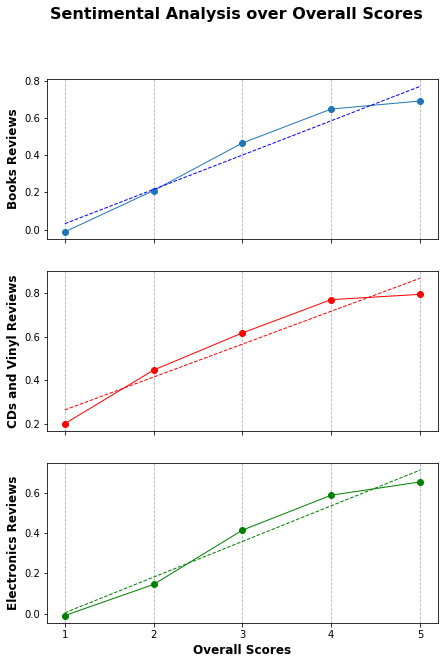

In [79]:
# chart for sentimental analysis vs overall numbers
overall_scores = [1, 2, 3, 4, 5]

fig, (ch_book, ch_cd, ch_elec) = plt.subplots(3, sharex=True, figsize=(7, 10))
fig.suptitle("Sentimental Analysis over Overall Scores", fontsize=16, fontweight="bold")

ch_book.plot(overall_scores, df_book_analys['Average Review Compound'], linewidth=1, marker="o")
ch_book.plot(overall_scores, book_fit, "b--", linewidth=1)
ch_book.set_ylabel('Books Reviews', fontsize=12, fontweight="bold")
ch_book.xaxis.grid(True, linestyle='--')

ch_cd.plot(overall_scores, df_cd_analys['Average Review Compound'], linewidth=1, marker="o", color="r")
ch_cd.plot(overall_scores, cd_fit, "r--", linewidth=1)
ch_cd.set_ylabel('CDs and Vinyl Reviews', fontsize=12, fontweight="bold")
ch_cd.xaxis.grid(True, linestyle='--')

ch_elec.plot(overall_scores, df_elec_analys['Average Review Compound'], linewidth=1, marker="o", color="g")
ch_elec.plot(overall_scores, elec_fit, "g--", linewidth=1)
ch_elec.set_ylabel('Electronics Reviews', fontsize=12, fontweight="bold")
ch_elec.set_xlabel("Overall Scores", fontsize=12, fontweight="bold")
ch_elec.xaxis.set_major_locator(MaxNLocator(integer=True))
ch_elec.xaxis.grid(True, linestyle='--')

plt.savefig('SentimentalAnalysis_OverallScores.png')

In [50]:
#  chart for sentimental analysis vs helpfulness for books.
review_book = helpful_df1_book['reviewText']

# for Books

overall_dict_book1 = {}

helpfulness_book1 = helpful_df1_book['helpfulness']

compound_list_book = []

for row in review_book:
    
        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list_book.append(compound)




        



helpfulness_dict_book1 = {
    "Helpfulness" : helpfulness_book1,
    "Compounds" : compound_list_book,
}

df_book_analys1 = pd.DataFrame(helpfulness_dict_book1)
df_book_analys1.head()

,Compounds,Helpfulness
129303,-0.9363,1
1022197,-0.1791,0
1477615,0.6623,0
788666,0.9955,0.142857
1806726,0.7269,1


In [51]:
len(df_book_analys1)

4324

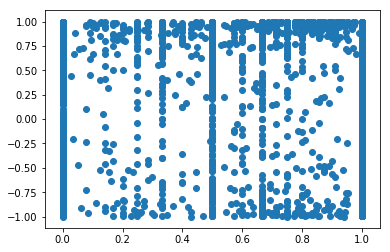

In [54]:
# for book
plt.scatter(df_book_analys1['Helpfulness'], df_book_analys1['Compounds'])


In [55]:
#  chart for sentimental analysis vs helpfulness for cds.
review_cd = helpful_df1_cd['reviewText']

# for Books

overall_dict_cd1 = {}

helpfulness_cd1 = helpful_df1_cd['helpfulness']

compound_list_cd = []

for row in review_cd:
    
        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list_cd.append(compound)




        



helpfulness_dict_cd1 = {
    "Helpfulness" : helpfulness_cd1,
    "Compounds" : compound_list_cd,
}

df_cd_analys1 = pd.DataFrame(helpfulness_dict_cd1)
df_cd_analys1.head()

,Compounds,Helpfulness
310502,0.9859,0.930233
186507,0.9788,1
321324,0.9774,1
240526,0.9742,1
261622,0.9025,0.5


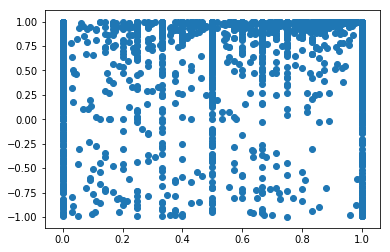

In [56]:
# for cd
plt.scatter(df_cd_analys1['Helpfulness'], df_cd_analys1['Compounds'], color='r')

In [59]:
#  chart for sentimental analysis vs helpfulness for cds.
review_elec = helpful_df1_elec['reviewText']

# for Books

overall_dict_elec1 = {}

helpfulness_elec1 = helpful_df1_elec['helpfulness']

compound_list_elec = []

for row in review_elec:
    
        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list_elec.append(compound)




        



helpfulness_dict_elec1 = {
    "Helpfulness" : helpfulness_elec1,
    "Compounds" : compound_list_elec,
}

df_elec_analys1 = pd.DataFrame(helpfulness_dict_elec1)
df_elec_analys1.head()

,Compounds,Helpfulness
284943,0.9606,1
1152859,0.9891,1
887421,0.7539,0.666667
996513,0.9507,0.8
1074361,0.9600,1


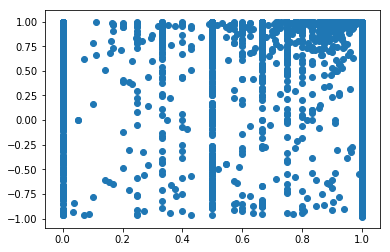

In [60]:
# for electronics
plt.scatter(df_elec_analys1['Helpfulness'], df_elec_analys1['Compounds'])

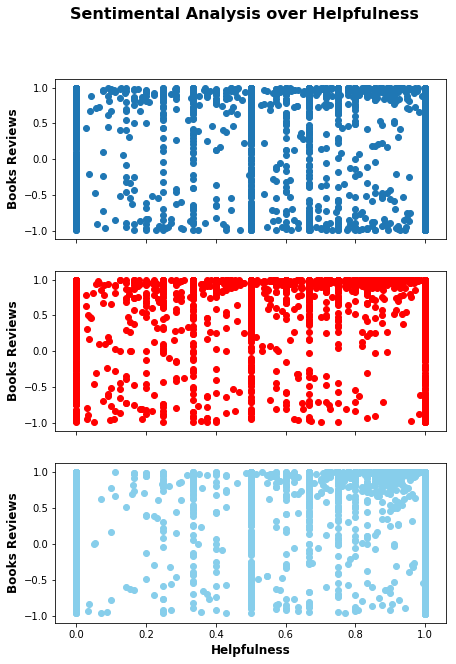

In [77]:
plots, (ax_book, ax_cd, ax_elec) = plt.subplots(3, sharex=True, figsize=(7, 10))
plots.suptitle("Sentimental Analysis over Helpfulness", fontsize=16, fontweight="bold")

ax_book.scatter(df_book_analys1['Helpfulness'], df_book_analys1['Compounds'])
ax_book.set_ylabel('Books Reviews', fontsize=12, fontweight="bold")
ax_cd.scatter(df_cd_analys1['Helpfulness'], df_cd_analys1['Compounds'], color='r')
ax_cd.set_ylabel('Books Reviews', fontsize=12, fontweight="bold")
ax_elec.scatter(df_elec_analys1['Helpfulness'], df_elec_analys1['Compounds'], color='skyblue')
ax_elec.set_ylabel('Books Reviews', fontsize=12, fontweight="bold")
ax_elec.set_xlabel("Helpfulness", fontsize=12, fontweight="bold")

plt.savefig('SentimentalAnalysis_Helpfulness.png')